# Beta Supervised Learning Report

**The objective is to create a model that if a customer will leave the bank based on past client behavior. A model with a high F1 score (at least 0.59). The following steps will be used to achieve the objective:**

Step 1.Download and prepare the data. Explain the procedure.

Step 2. Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

Step 3. Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

Step 4. Perform the final testing

Step 5. Form a general conclusion

## Download and prepare the data. Explain the procedure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

data = pd.read_csv('/datasets/Churn.csv')
try:
    display(data.head(10), data.info())
except:
    display('cannot read csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


None

In [2]:
#first, RowNumber, CustomerID, and Surname are all columns that are not relevant as features and should be removed
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.isnull().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [4]:
#percentage effect of missing data
data.isnull().sum()/len(data)
#it affects more than 5% of the data -- a representative value (mean) should be used

CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

In [5]:
#filling in 0's for the missing Tenure values
data['Tenure'] = data['Tenure'].fillna(0).astype('int')
data.isnull().sum()
#missing values have been successfully filled in

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#The Gender and Geography features needed to be encoded
data = pd.get_dummies(data)
data.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Conclusion 

1) The data was readable and non-corrupt

2) All feature date types looked acceptable -- no conversions necessary

3) Missing data was apparant for only one feature -- Tenure -- which was filled in via the mean

4) The rest of the data had equal number of rows meaning there was no missing data

5) One-hot-encoding was used after qualitative variables were removed

6) Once data is split, features need to be scaled because of the large spread in numerical values

7) The data is now ready for training

## Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

In [7]:
#first split the data (3:1:1 ratio since only the source data exists)
train_size = 0.8

features = data.drop('Exited', axis=1)
target = data['Exited']

#train = 60%, rem = remaining 40%
features_train, features_rem, target_train, target_rem = train_test_split(features, target, 
                                                                          train_size=0.8, random_state=12345)

#split rem in half: (rem = valid + test)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem, target_rem,
                                                                           train_size=0.5, random_state=12345)
display(features_train.shape, target_train.shape, 
        features_valid.shape, target_valid.shape,
        features_test.shape, target_test.shape)

(8000, 13)

(8000,)

(1000, 13)

(1000,)

(1000, 13)

(1000,)

In [8]:
#Next, features need to be scaled
numeric = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 
           'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
          'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
pd.options.mode.chained_assignment = None

print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
454      1.107585  0.011482  0.466088  0.819420      -0.899779  -1.551033   
8307    -0.338704 -0.844298 -0.496821  0.923294      -0.899779   0.644731   
4811    -0.782922 -1.224645  0.787058 -1.220083       0.811234   0.644731   
1132    -0.235398 -0.178692 -1.459730 -1.220083       0.811234   0.644731   
9640     1.024940 -0.368865 -0.496821 -1.220083      -0.899779   0.644731   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
454         0.960528        -0.757878          0.997503          -0.576965   
8307        0.960528        -1.194506          0.997503          -0.576965   
4811       -1.041094         0.212357         -1.002503          -0.576965   
1132        0.960528         1.239310          0.997503          -0.576965   
9640       -1.041094         1.583001          0.997503          -0.576965   

      Geography_Spain  Gender_Female  Gender_Male  
454         -0.5

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

<div class="alert alert-block alert-success">
<b>Success:</b> Great that scaler was fitted only on train part!
</div>

In [9]:
#Next, find an adequate model in terms of f1_score

results=[]
for depth in range(1, 20):
    for criterion in ('gini', 'entropy'):
        for splitter in ('best', 'random'):
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                           criterion=criterion, splitter= splitter)
            model.fit(features_train, target_train)
            preds = model.predict(features_valid)
            results.append({
                'f1_score': f1_score(target_valid, preds),
                'Max_depth': depth,
                'criterion': criterion,
                'splitter': splitter})
    
results = pd.DataFrame(results)
results = results.sort_values(by='f1_score', ascending=False)
results.head(10)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1_score,Max_depth,criterion,splitter
18,0.612466,5,entropy,best
16,0.588235,5,gini,best
33,0.578249,9,gini,random
30,0.573003,8,entropy,best
22,0.567073,6,entropy,best
32,0.565934,9,gini,best
21,0.565598,6,gini,random
4,0.563452,2,gini,best
6,0.563452,2,entropy,best
36,0.560847,10,gini,best


In [10]:
#RandomForest
results=[]

for estimator in range(100, 150):
    model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    preds = model.predict(features_valid)
    results.append({
                'f1_score': f1_score(target_valid, preds),
                'n_estimator': estimator})
    
results = pd.DataFrame(results)
results = results.sort_values(by='f1_score', ascending=False)
results

,f1_score,n_estimator
31,0.556818,131
44,0.555874,144
42,0.555874,142
29,0.555241,129
41,0.554286,141
40,0.554286,140
43,0.554286,143
39,0.554286,139
35,0.552707,135
30,0.552707,130


In [11]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
preds = model.predict(features_valid)

print(f1_score(target_valid, preds))

0.29042904290429045


### Conclusion: Best model -- unbalanced

1) The model that produced the best f1 was the RandomForestClassifier (0.570) with n-estimators=89

2) The worst model was the logistic regression at 0.333 f1_score

3) The RandomForest model will be used to explore the other metrics

In [12]:
#Now it is time to explore class imbalance
model = DecisionTreeClassifier(random_state=12345, max_depth=5, criterion='entropy', splitter='best')
model.fit(features_train, target_train)
preds = model.predict(features_valid)

display(confusion_matrix(target_valid, preds))

array([[744,  31],
       [112, 113]])

### Conclusion: Confusion matrix

1) TN: 748, TP: 113, FP: 31, FN: 112

2) There is a clear class imbalance leaning towards the TN metric

In [13]:
print('Recall:', recall_score(target_valid, preds), 
        'Precision:', precision_score(target_valid, preds),
     'f1:', f1_score(target_valid, preds))

Recall: 0.5022222222222222 Precision: 0.7847222222222222 f1: 0.6124661246612466


### Conclusion: Initial Metrics Evaluation

1) Recall value is barely considered closer to 1 while precision is close to 1

3) An acceptable f1_score has been achieved, however, class imbalance needs to be improved in order to achieve adequate results with the test set

##  Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

In [14]:
#Try balancing
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=5, 
                               criterion='entropy', splitter='best')
model.fit(features_train, target_train)
preds = model.predict(features_valid)

f1_score(target_valid, preds)
#class_weight balancing on DecisionTree model made the score slightly worse

0.5849673202614379

In [15]:
#Does a different model influence this?
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
preds = model.predict(features_valid)

f1_score(target_valid, preds)
#Balancing on a different model also made it worse

0.5079365079365079

In [16]:
#Lets try manual balance adjustment
model = DecisionTreeClassifier(random_state=12345, max_depth=5, criterion='entropy', splitter='best',
                              class_weight={0: 0.06467336683417085, 1: 0.9353266331658292})
model.fit(features_train, target_train)
preds = model.predict(features_valid)

f1_score(target_valid, preds)
#manual balancing on DecisionTree model made the score much worse

0.469298245614035

In [17]:
# The class_weight parameter failed even with a different model, it is now time to try upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

results=[]
for depth in range(1, 20):
    for criterion in ('gini', 'entropy'):
        for splitter in ('best', 'random'):
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                           criterion=criterion, splitter= splitter)
            model.fit(features_upsampled, target_upsampled)
            preds = model.predict(features_valid)
            results.append({
                'f1_score': f1_score(target_valid, preds),
                'Max_depth': depth,
                'criterion': criterion,
                'splitter': splitter})
    
results = pd.DataFrame(results)
results = results.sort_values(by='f1_score', ascending=False)
results.head(10)
#The f1 score increased a by 0.04 when upsample factor is 3, max_depth=8, entropy, and random

,f1_score,Max_depth,criterion,splitter
31,0.651911,8,entropy,random
24,0.645022,7,gini,best
26,0.642697,7,entropy,best
16,0.641256,5,gini,best
18,0.638202,5,entropy,best
35,0.634656,9,entropy,random
30,0.626923,8,entropy,best
28,0.626556,8,gini,best
33,0.617587,9,gini,random
25,0.616601,7,gini,random


In [18]:
#Downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.40)

results=[]
for depth in range(1, 20):
    for criterion in ('gini', 'entropy'):
        for splitter in ('best', 'random'):
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                           criterion=criterion, splitter= splitter)
            model.fit(features_downsampled, target_downsampled)
            preds = model.predict(features_valid)
            results.append({
                'f1_score': f1_score(target_valid, preds),
                'Max_depth': depth,
                'criterion': criterion,
                'splitter': splitter})
    
results = pd.DataFrame(results)
results = results.sort_values(by='f1_score', ascending=False)
results.head(10)
#downsampling was slightly more effective than upsampling: downsample factor 0.4, depth 7, gini, random

,f1_score,Max_depth,criterion,splitter
25,0.657407,7,gini,random
16,0.638554,5,gini,best
18,0.638554,5,entropy,best
29,0.624277,8,gini,random
34,0.623742,9,entropy,best
22,0.621881,6,entropy,best
20,0.621881,6,gini,best
30,0.621514,8,entropy,best
26,0.620553,7,entropy,best
27,0.616438,7,entropy,random


In [19]:
#using the upsampled decision random forest model for threshold adjustment
model = DecisionTreeClassifier(random_state=12345, max_depth=7, criterion='gini', splitter='random')
model.fit(features_downsampled, target_downsampled)
preds = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, preds)
    recall = recall_score(target_valid, preds)
    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(threshold, precision, recall))
#threshold adjustment has no effect on the model

Threshold = 0.00 | Precision = 0.686, Recall = 0.631
Threshold = 0.02 | Precision = 0.686, Recall = 0.631
Threshold = 0.04 | Precision = 0.686, Recall = 0.631
Threshold = 0.06 | Precision = 0.686, Recall = 0.631
Threshold = 0.08 | Precision = 0.686, Recall = 0.631
Threshold = 0.10 | Precision = 0.686, Recall = 0.631
Threshold = 0.12 | Precision = 0.686, Recall = 0.631
Threshold = 0.14 | Precision = 0.686, Recall = 0.631
Threshold = 0.16 | Precision = 0.686, Recall = 0.631
Threshold = 0.18 | Precision = 0.686, Recall = 0.631
Threshold = 0.20 | Precision = 0.686, Recall = 0.631
Threshold = 0.22 | Precision = 0.686, Recall = 0.631
Threshold = 0.24 | Precision = 0.686, Recall = 0.631
Threshold = 0.26 | Precision = 0.686, Recall = 0.631
Threshold = 0.28 | Precision = 0.686, Recall = 0.631
Threshold = 0.30 | Precision = 0.686, Recall = 0.631
Threshold = 0.32 | Precision = 0.686, Recall = 0.631
Threshold = 0.34 | Precision = 0.686, Recall = 0.631
Threshold = 0.36 | Precision = 0.686, Recall =

In [20]:
#downsampling with class_weight balance
model = model = DecisionTreeClassifier(random_state=12345, class_weight='balanced',
                                       max_depth=7, criterion='gini', splitter='random')
model.fit(features_downsampled, target_downsampled)
preds = model.predict(features_valid)

f1_score(target_valid, preds)
#this decreased the f1 score

0.5642633228840126

In [21]:
#final valid set metric values

model = DecisionTreeClassifier(random_state=12345, max_depth=7, criterion='gini', splitter='random')
model.fit(features_downsampled, target_downsampled)
preds = model.predict(features_valid)

display('Recall:', recall_score(target_valid, preds), 
        'Precision:', precision_score(target_valid, preds),
     'f1:', f1_score(target_valid, preds),
     'auc-roc:', roc_auc_score(target_valid, probabilities_one_valid)
)

'Recall:'

0.6311111111111111

'Precision:'

0.6859903381642513

'f1:'

0.6574074074074074

'auc-roc:'

0.8459182795698924

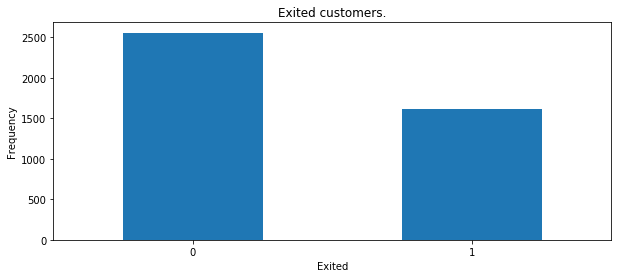

In [22]:
#PLOTTING THE TARGET (downsample=0.4).
count_target = pd.value_counts(target_downsampled, sort=True)
plt.figure(figsize=(10,4))
count_target.plot(kind='bar', rot=0)
plt.title('Exited customers.')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.show()
#displays how the class imbalanced has improved

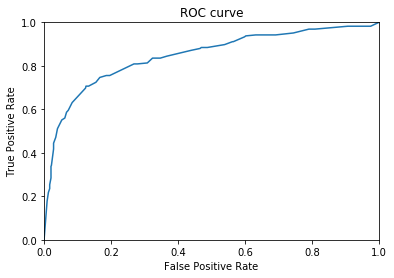

In [23]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Conclusion: Class Imbalance improvement

1) Several methods were used to improve class imbalance: a) class_weight balance, b) manual class_weight adjustment, c) different model with class_weight balance, d) upsampling, e) downsampling, and f) class threshold adjustment

2) The best method for improving f1_score was downsampling the majority class by 0.4

3) This resulted in an acceptable f1_score: 0.657

4) auc-roc score: 0.845

## Perform the final testing 

In [24]:
features_test[numeric] = scaler.transform(features_test[numeric])
model = DecisionTreeClassifier(random_state=12345, max_depth=7, criterion='gini', splitter='random')
model.fit(features_downsampled, target_downsampled)
preds = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

display('f1:', f1_score(target_test, preds),
        'accuracy:', accuracy_score(target_test, preds),
       'ROC-AUC', roc_auc_score(target_test, probabilities_one_test))


'f1:'

0.5911330049261084

'accuracy:'

0.834

'ROC-AUC'

0.8352657634184473

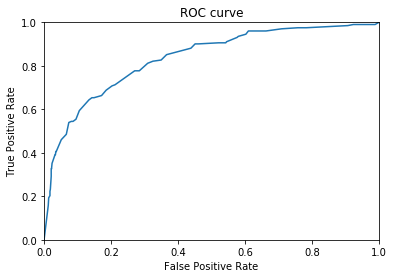

In [25]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


### Conclusion: 

1) In validation trials, the  model's f1 score reached an adequate level (0.657) and achieved 0.59 on the test set

2) The ROC-AUC score decreased slightly from before (0.845) and after the test set (0.835)

3) The ROC-curve plots are very similar to one another

## General Conclusion

1) The model has been improved by rechecking hyperparameters during downsampling, resulting in the highest f1_score of 0.657 in the validation trials and 0.59 in the test trial

2) An adequate DecisionTree model to predict whether a client will leave the bank is now functional for Beta Bank to use on future data is now functional